In [51]:
import pandas as pd
import get_data as gd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from os import walk
import csv
from pychadwick.chadwick import Chadwick  
#https://github.com/jldbc/pybaseball
#https://baseballsavant.mlb.com/csv-docs
from pybaseball import statcast_pitcher
import seaborn as sns
from pybaseball import statcast
import statsmodels.api as sm

# Runs & Wins

The goal of any baseball team is to win as many games as you can, which you do by scoring more runs than you allow. Therefore like they say in MOneyball "Runs is the currency of winning". What this means is when you want to evaluating a player you don't need to neccessarily try and figure out how much they contribute to winning percentage, rather you can focus on how they contribute to runs scored/allowed and use that as a proxy.

Below is some basic code that loads in the Lahman data set and calculates the Winning Percentage, Runs Per Game and Runs Allowed Per Game. Then a scatter plot is created to show the correlation of the variables and finally a an simple linear regression is made.

The regression shows a high R^2 which gives us confidence that runs and runs allowed per game explain a large amount of the variance in win percentage.

In [61]:
teams_df = gd.make_df("Teams") 
teams_df = teams_df[teams_df['yearID'] >=1970]
teams_df['Win Percentage'] = teams_df['W']/teams_df['G']
teams_df['Runs Per Game'] = teams_df['R']/teams_df['G']
teams_df['Runs Allowed Per Game'] = teams_df['RA']/teams_df['G']
teams_df['Run Difference Per Game'] = teams_df['Runs Per Game'] - teams_df['Runs Allowed Per Game'] 

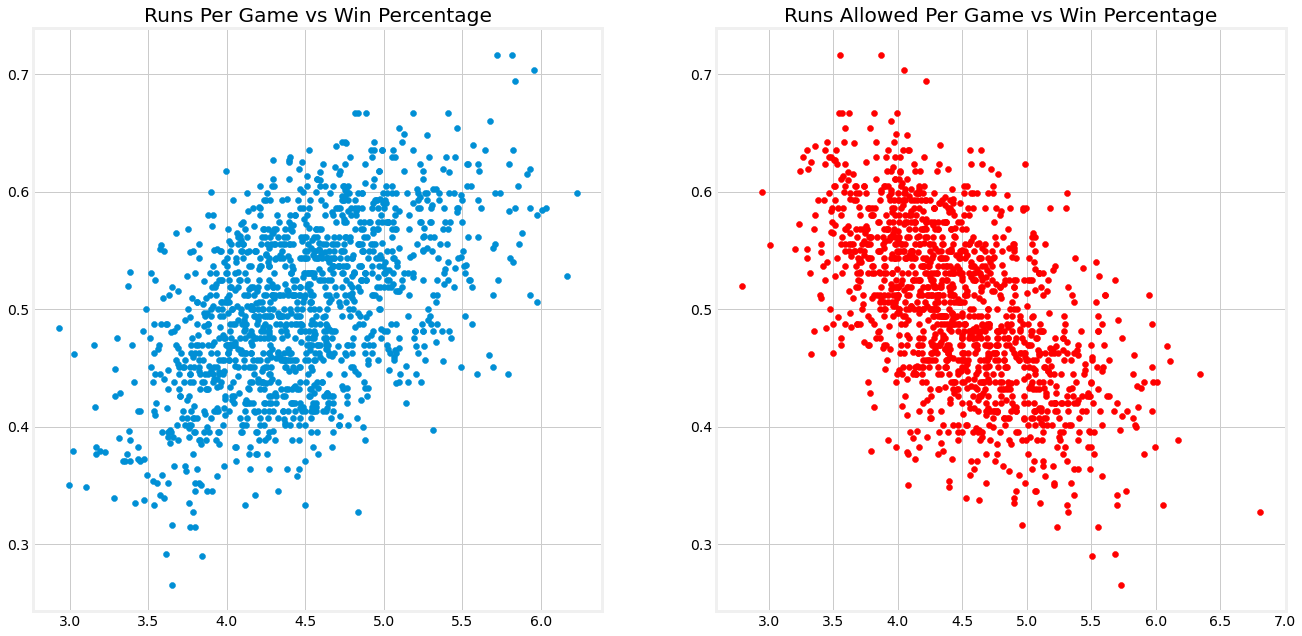

In [62]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(20,10))

gs = fig.add_gridspec(1,2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

fig.patch.set_facecolor('white')
ax1.set_facecolor('white')
ax1.scatter(teams_df['Runs Per Game'], teams_df['Win Percentage'])
ax1.set_title('Runs Per Game vs Win Percentage')

fig.patch.set_facecolor('white')
ax2.set_facecolor('white')
ax2.scatter(teams_df['Runs Allowed Per Game'], teams_df['Win Percentage'], color='red')
ax2.set_title('Runs Allowed Per Game vs Win Percentage')
plt.show()

In [63]:
teams_df['Intercept'] = 1
full_model = sm.OLS(teams_df['Win Percentage'], 
                            teams_df[['Runs Per Game','Runs Allowed Per Game','Intercept']], hasconst=True).fit()
print(full_model.summary())


                            OLS Regression Results                            
Dep. Variable:         Win Percentage   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     4713.
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        08:59:13   Log-Likelihood:                 3177.6
No. Observations:                1414   AIC:                            -6349.
Df Residuals:                    1411   BIC:                            -6333.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Runs Per Game             0.10

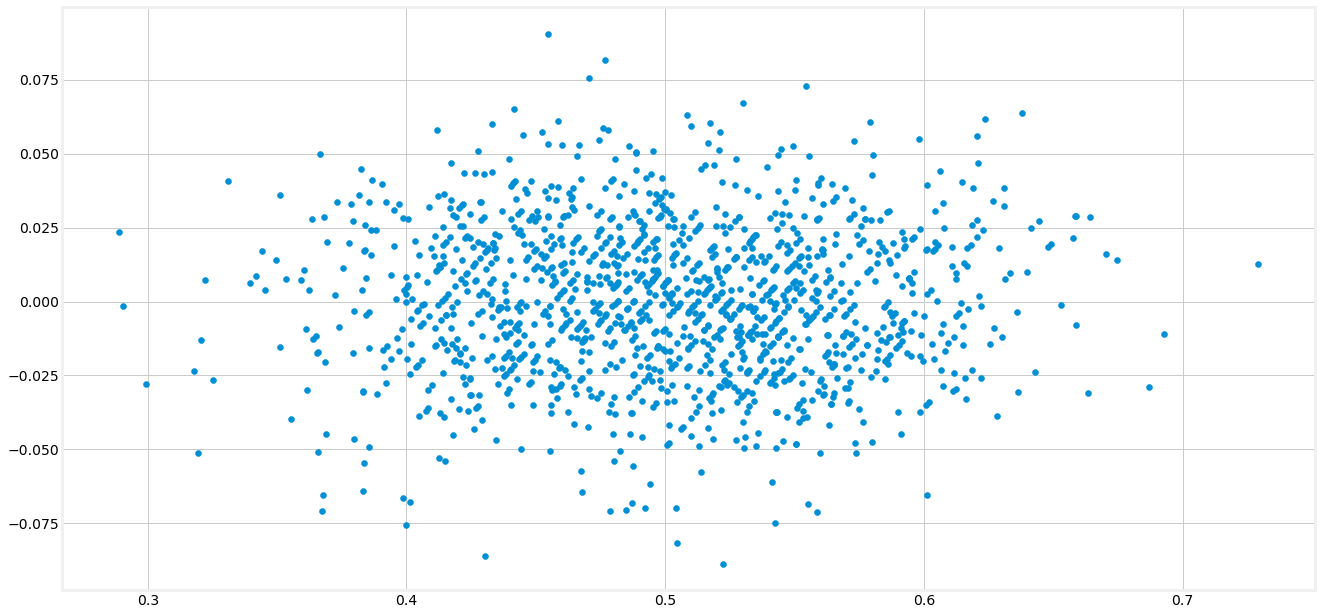

In [64]:
prediction = full_model.predict(teams_df[['Runs Per Game','Runs Allowed Per Game','Intercept']])
res = prediction - teams_df['Win Percentage']
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize= (20,10))
fig.patch.set_facecolor('white')
ax.scatter(prediction, res)
ax.set_facecolor('white')
#ax.set_xlim(0,100)
#ax.set_ylim(-20,20)

# Pythrongan Formula for Winning Percentage

Bill James developed an formula for estimating winning percentage which was R^2 / (R^2+RA^2)

In [65]:
import numpy as np
teams_df = teams_df[teams_df['yearID'] >=1970]
y = teams_df['Win Percentage']
teams_df['bill_james'] = teams_df['R']**2/(teams_df['R']**2 + teams_df['RA']**2)
X = teams_df['bill_james'] 

In [66]:
bill_james_model = sm.OLS(y, X).fit()
print(bill_james_model.summary())

                                 OLS Regression Results                                
Dep. Variable:         Win Percentage   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          5.376e+05
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                        0.00
Time:                        08:59:24   Log-Likelihood:                          3162.7
No. Observations:                1414   AIC:                                     -6323.
Df Residuals:                    1413   BIC:                                     -6318.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

(0.0, 1.0)

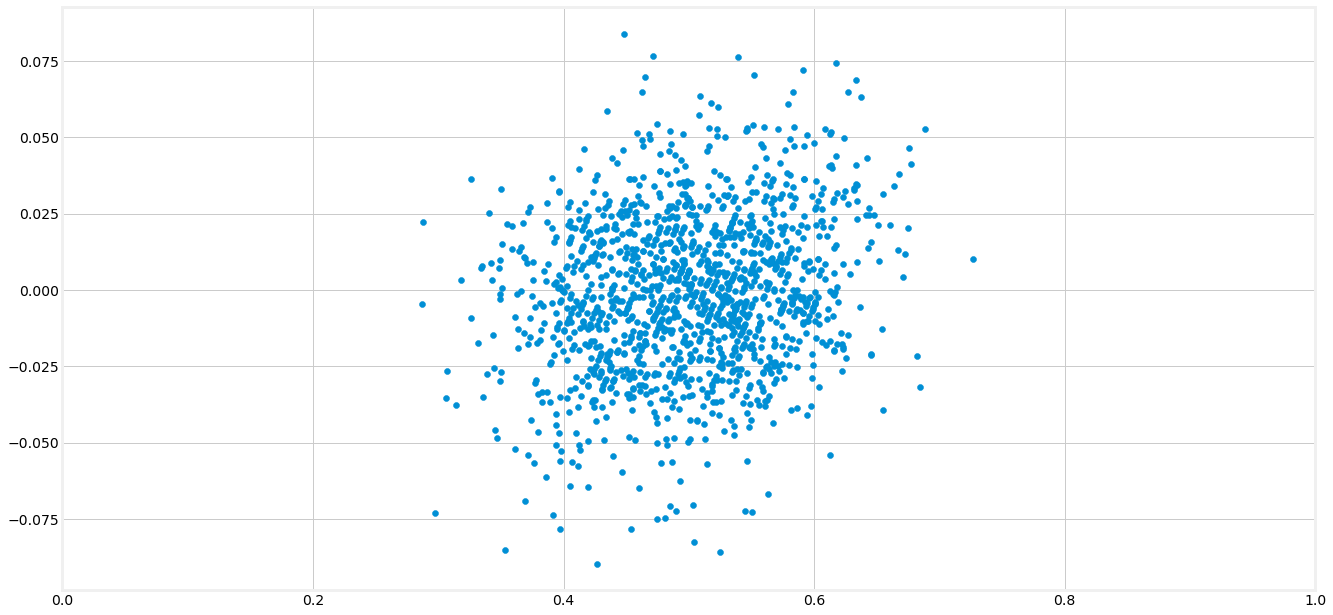

In [67]:
prediction = bill_james_model.predict(X)
res = prediction - y
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize= (20,10))
fig.patch.set_facecolor('white')
ax.scatter(prediction, res)
ax.set_facecolor('white')
ax.set_xlim(0,1)